# Lets have a look how biases are defined...

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import scipy

import cosmo_wap as cw

# compute cosmology with class

In [2]:
#import and define cosmlogy in class
from classy import Class

#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 100 #UNITS: 1/Mpc # is also set to 10 later #100 for sigma integration
params = {'output':'mPk,mTk',
             'non linear':'halofit',
             'Omega_b':Omega_b,
             'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
             'h':h,
             'n_s':n_s,
             'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
             'P_k_max_1/Mpc':k_max,
             'z_max_pk':10. 
}

#Initialize the cosmology and compute everything
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# So we need to also define survey specific parameters like biases

In [3]:
survey_params = cw.survey_params.SurveyParams(cosmo)

In [4]:
survey_params.Euclid.b_1
print(survey_params.Euclid.__dict__.keys())

dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


In [14]:
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid])

Computing bias params...


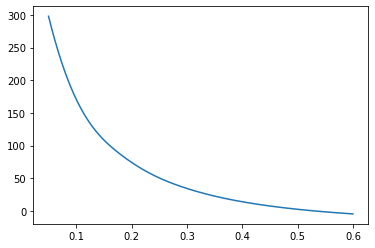

In [10]:
zz = cosmo_funcs.z_survey
#plt.plot(zz,cosmo_funcs.survey.M0_func(zz))
plt.plot(zz,cosmo_funcs.survey.NO_func(zz))

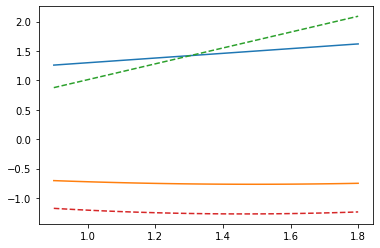

In [14]:
zz = np.linspace(0.9,1.8)
plt.plot(zz,cosmo_funcs.survey.b_1(zz))
plt.plot(zz,cosmo_funcs.survey.b_2(zz))
plt.plot(zz,cosmo_funcs.survey.loc.b_psi(zz),'--')
plt.plot(zz,cosmo_funcs.survey.loc.b_psi_delta(zz),'--')